In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import seaborn as sns
plt.rcParams['figure.figsize'] = (20, 10)
import warnings
warnings.filterwarnings('ignore')


/Users/jbanerje/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/jbanerje/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/var/folders/jn/zl4rcc1s56s5p6fm169l94mc0000gn/T/ipykernel_7877/2869295561.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was too old on your system - pyarrow 10.0.1 is the current minimum supported version as of this release.
If this would cause problems for you,
please provide us feedback at htt

### Notes
- We have metrics for all of these nodes
- Not sure about the impact for mixing CPU starvation in percentage with latency metrics in this model
- https://access.redhat.com/articles/6271341
- https://access.redhat.com/solutions/4770281
- https://access.redhat.com/solutions/4885641



In [2]:
causal_graph = nx.DiGraph([('CPUStarvation', 'etcdResponseTime'),
                           ('etcdNetworkPeer', 'etcdResponseTime'),
                           ('etcdBackendCommitDur', 'etcdResponseTime'),
                           ('etcdWalfsyncDur', 'etcdResponseTime'),
                           ('etcdResponseTime', 'APIServerCache'),
                           ('APIServerCache', 'APIServerResponse')
                          ])

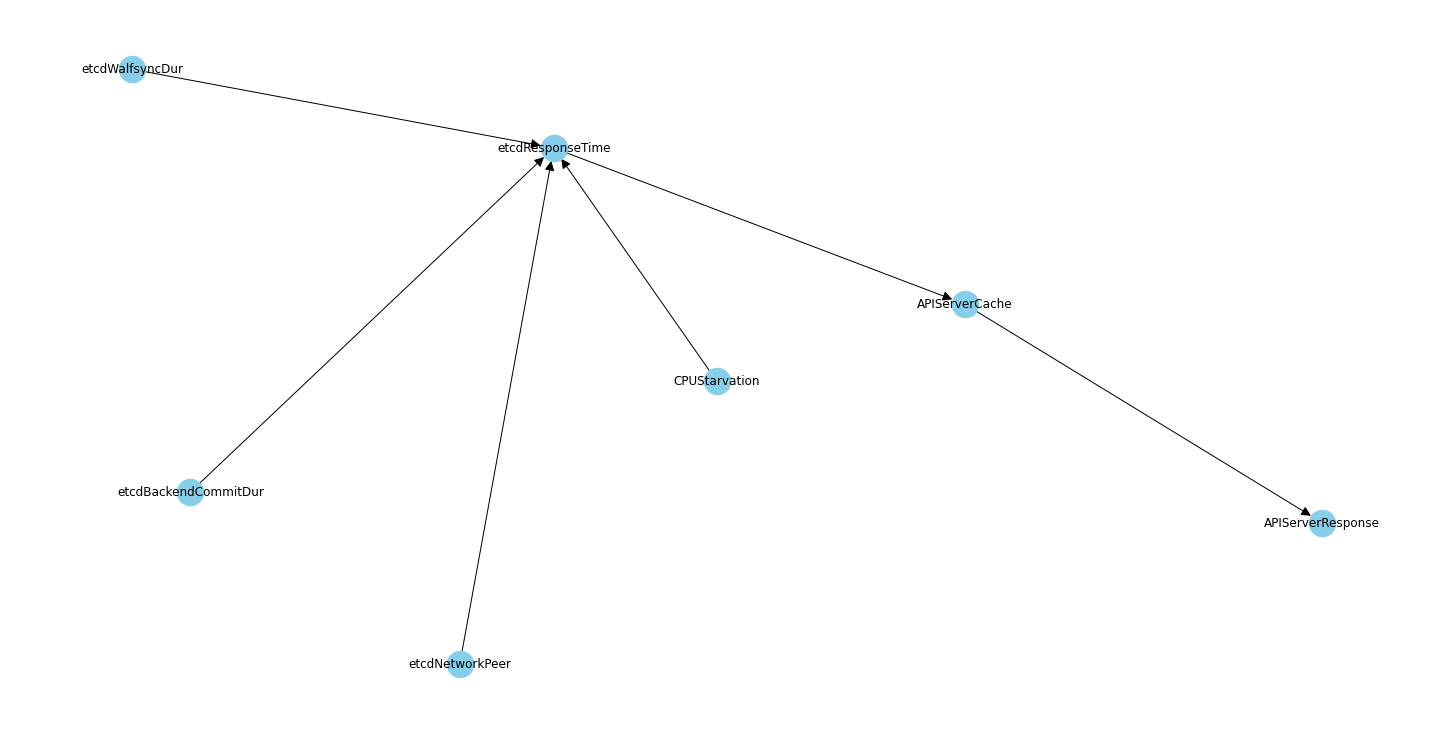

In [3]:
# Position nodes using a spring layout algorithm
#NetworkX provides a variety of layout algorithms for visualizing graphs. 
#spring_layout is just one of them. 
pos = nx.spring_layout(causal_graph) 
#pos = nx.kamada_kawai_layout(causal_graph)
#pos = nx.spectral_layout(causal_graph) 
nx.draw(causal_graph, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=12, font_color="black", arrowsize=20)

#saving is just for kicks
plt.savefig("diagram/kube-api-dependency.png")
# Display the graph
plt.show()
plt.close('all')
